# Plot global overturning

In [1]:
import cosima_cookbook as cc
from dask.distributed import Client

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cmocean as cm
import matplotlib.gridspec as gridspec
%matplotlib inline

# Stop annoying warnings coming out of xarray.
import warnings
warnings.filterwarnings('ignore')

In [2]:
client = Client()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/8787/status,
Dashboard: /proxy/8787/status,Workers: 7
Total threads: 28,Total memory: 125.20 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:46639,Workers: 7
Dashboard: /proxy/8787/status,Total threads: 28
Started: Just now,Total memory: 125.20 GiB
Comm: tcp://127.0.0.1:46771,Total threads: 4
Dashboard: /proxy/36717/status,Memory: 17.89 GiB
Nanny: tcp://127.0.0.1:45995,


In [3]:
# CM2 database
session_CM2 = cc.database.create_session('/g/data/p73/archive/non-CMIP/ACCESS-CM2/CM2.db')
expt_CM2_025 = 'cj877'
expt_CM2_1   = 'bz687'

In [4]:
# OM2 database
session_OM2  = cc.database.create_session('/g/data/ik11/databases/cosima_master.db')
expt_OM2_025 = '025deg_jra55_ryf9091_gadi'
expt_OM2_1   = '1deg_jra55_ryf9091_gadi'

In [5]:
path_to_data = '/g/data/x77/wgh581/Post_Process/ACCESS_CM2_025/'

If you get a 'read-only database' warning, it is because the database has not finished building. 

In [6]:
# Plotting info
ft_size = 16
plt.rcParams.update({'font.size': ft_size})
fig_path = '/g/data/x77/wgh581/Figures/Figures_ACCESS_CM2/'

### Load overturning data

Calculated in `Calc_overturning.ipynb`

In [37]:
psi_CM2_025 = xr.open_dataarray(path_to_data + 'psi_global_0_499.nc')

In [38]:
psi_CM2_1   = xr.open_dataarray(path_to_data + 'Comparison_ACCESS_CM2_1/psi_global_CM2_1_400_499.nc')
psi_OM2_025 = xr.open_dataarray(path_to_data + 'Comparison_ACCESS_OM2_025/psi_global_OM2_025_2300_2399.nc')
psi_OM2_1   = xr.open_dataarray(path_to_data + 'Comparison_ACCESS_OM2_1/psi_global_OM2_1_2500_2599.nc')

Time average

In [39]:
psi_CM2_025_mean = psi_CM2_025[399:498].mean('time')
psi_CM2_1_mean   = psi_CM2_1.mean('time')
psi_OM2_025_mean = psi_OM2_025.mean('time')
psi_OM2_1_mean   = psi_OM2_1.mean('time')

AMO +ve and -ve composites

In [10]:
year_pos_amo = [  2,   6,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  97,  98,  99, 100, 103, 104, 105, 112, 113,
       191, 193, 194, 197, 199, 201, 202, 203, 204, 205, 206,
       207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 218,
       219, 220, 227, 231, 301, 302, 303, 304, 305, 306, 307,
       308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318,
       319, 320, 321, 322, 323, 324, 325, 326, 327, 334, 339,
       340, 341, 383, 384, 393, 394, 496, 497, 498, 499]

year_neg_amo = [ 32,  33,  35, 137, 139, 141, 142, 145, 146, 147, 153,
       155, 156, 158, 159, 160, 161, 162, 163, 165, 167, 168,
       169, 170, 171, 173, 174, 175, 176, 177, 179, 180, 181,
       182, 257, 258, 260, 266, 267, 268, 269, 270, 271, 272,
       273, 274, 347, 350, 351, 352, 353, 354, 355, 356, 357,
       358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368,
       410, 460, 466, 470, 471, 472, 474, 475, 476, 477]

year_pos_amo_minus1 = [ii-1 for ii in year_pos_amo]
year_neg_amo_minus1 = [ii-1 for ii in year_neg_amo]

In [11]:
psi_CM2_025_amo_pos = psi_CM2_025[year_pos_amo_minus1,...].mean('time')
psi_CM2_025_amo_neg = psi_CM2_025[year_neg_amo_minus1,...].mean('time')

### Plot overturning

In [18]:
clev=np.arange(-25,27,2)
yticks = np.array([1030, 1032, 1033, 1034, 1035, 1036,1036.5, 1037])
scfac  = 4  ## A power to set the stretching of the y-axis

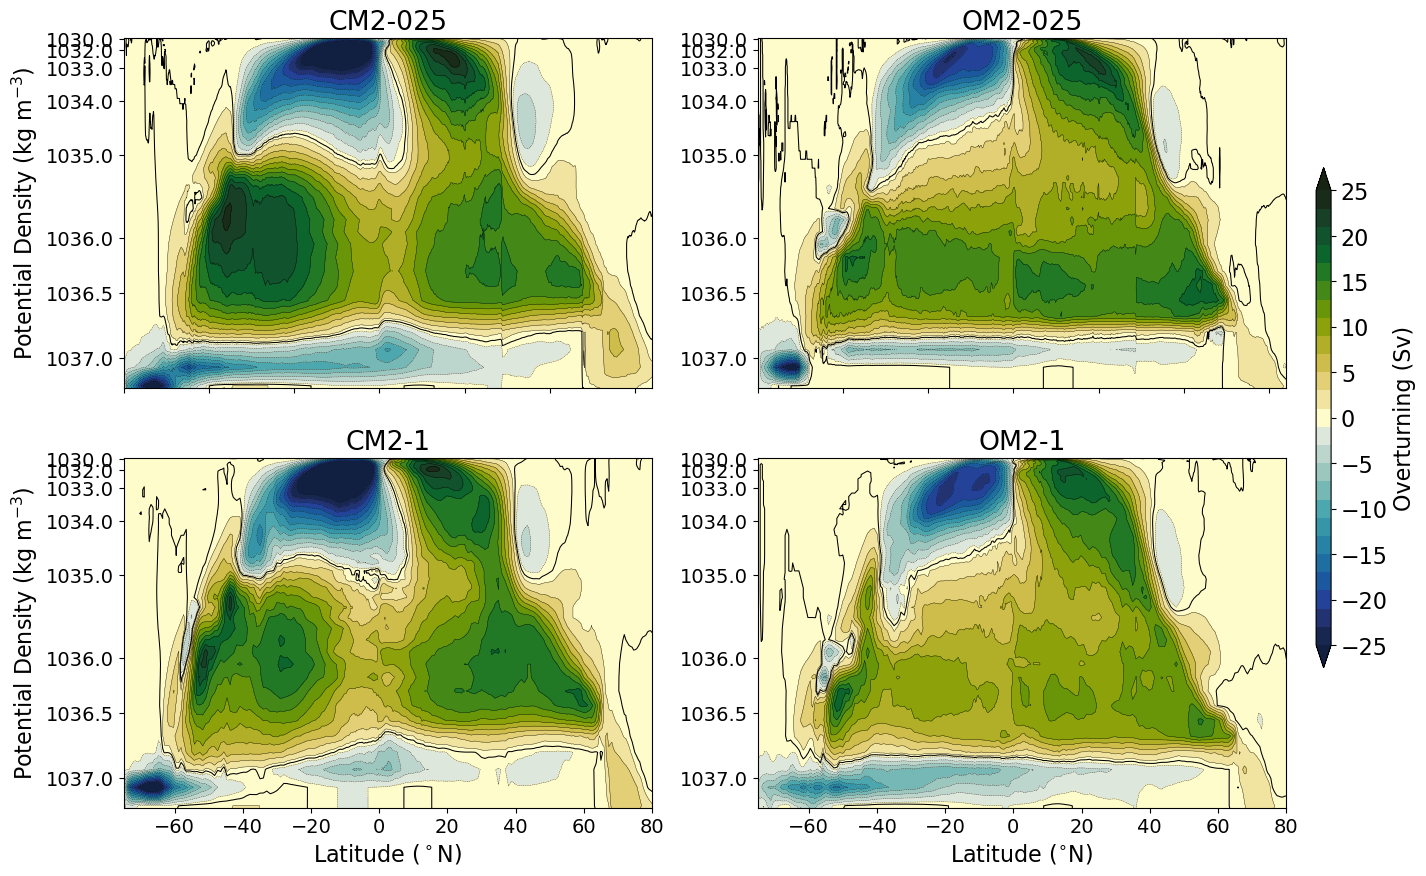

In [40]:
fig, ax = plt.subplots(2,2, figsize=(15,10))
ax0 = ax[0,0]
ax1 = ax[0,1]
ax2 = ax[1,0]
ax3 = ax[1,1]

# CM2-025
p1 = ax0.contourf(psi_CM2_025_mean.grid_yu_ocean,(psi_CM2_025_mean.potrho-1028)**scfac, psi_CM2_025_mean, cmap=cm.cm.delta, levels=clev, extend='both')
ax0.contour(psi_CM2_025_mean.grid_yu_ocean,(psi_CM2_025_mean.potrho-1028)**scfac, psi_CM2_025_mean, levels=clev, colors='k', linewidths=0.25)
ax0.contour(psi_CM2_025_mean.grid_yu_ocean,(psi_CM2_025_mean.potrho-1028)**scfac, psi_CM2_025_mean, levels=[0.0,], colors='k', linewidths=0.75)
ax0.set_yticks((yticks-1028)**scfac)
ax0.set_yticklabels(yticks, fontsize=ft_size-2)
ax0.set_ylim([0.5**scfac, 9.2**scfac])
ax0.invert_yaxis()
ax0.set_ylabel('Potential Density (kg m$^{-3}$)')
ax0.set_xlim([-75,80])
ax0.set_title('CM2-025')
ax0.tick_params(labelbottom=False)

# OM2-025
p1 = ax1.contourf(psi_OM2_025_mean.grid_yu_ocean,(psi_OM2_025_mean.potrho-1028)**scfac, psi_OM2_025_mean, cmap=cm.cm.delta, levels=clev, extend='both')
ax1.contour(psi_OM2_025_mean.grid_yu_ocean,(psi_OM2_025_mean.potrho-1028)**scfac, psi_OM2_025_mean, levels=clev, colors='k', linewidths=0.25)
ax1.contour(psi_OM2_025_mean.grid_yu_ocean,(psi_OM2_025_mean.potrho-1028)**scfac, psi_OM2_025_mean, levels=[0.0,], colors='k', linewidths=0.75)
ax1.set_yticks((yticks-1028)**scfac)
ax1.set_yticklabels(yticks, fontsize=ft_size-2)
ax1.set_ylim([0.5**scfac, 9.2**scfac])
ax1.invert_yaxis()
ax1.set_xlim([-75,80])
ax1.set_title('OM2-025')
ax1.tick_params(labelbottom=False)

# CM2-1
p1 = ax2.contourf(psi_CM2_1_mean.grid_yu_ocean,(psi_CM2_1_mean.potrho-1028)**scfac, psi_CM2_1_mean, cmap=cm.cm.delta, levels=clev, extend='both')
ax2.contour(psi_CM2_1_mean.grid_yu_ocean,(psi_CM2_1_mean.potrho-1028)**scfac, psi_CM2_1_mean, levels=clev, colors='k', linewidths=0.25)
ax2.contour(psi_CM2_1_mean.grid_yu_ocean,(psi_CM2_1_mean.potrho-1028)**scfac, psi_CM2_1_mean, levels=[0.0,], colors='k', linewidths=0.75)
ax2.set_yticks((yticks-1028)**scfac)
ax2.set_yticklabels(yticks, fontsize=ft_size-2)
ax2.set_ylim([0.5**scfac, 9.2**scfac])
ax2.invert_yaxis()
ax2.set_xlabel('Latitude ($^\circ$N)')
ax2.set_xlim([-75,80])
ax2.set_title('CM2-1')
ax2.set_ylabel('Potential Density (kg m$^{-3}$)')
ax2.tick_params(axis='both', labelsize=ft_size-2)

# OM2-1
p1 = ax3.contourf(psi_OM2_1_mean.grid_yu_ocean,(psi_OM2_1_mean.potrho-1028)**scfac, psi_OM2_1_mean, cmap=cm.cm.delta, levels=clev, extend='both')
ax3.contour(psi_OM2_1_mean.grid_yu_ocean,(psi_OM2_1_mean.potrho-1028)**scfac, psi_OM2_1_mean, levels=clev, colors='k', linewidths=0.25)
ax3.contour(psi_OM2_1_mean.grid_yu_ocean,(psi_OM2_1_mean.potrho-1028)**scfac, psi_OM2_1_mean, levels=[0.0,], colors='k', linewidths=0.75)
ax3.set_yticks((yticks-1028)**scfac)
ax3.set_yticklabels(yticks, fontsize=ft_size-2)
ax3.set_ylim([0.5**scfac, 9.2**scfac])
ax3.invert_yaxis()
ax3.set_xlabel('Latitude ($^{\circ}$N)')
ax3.set_xlim([-75,80])
ax3.set_title('OM2-1')
ax3.tick_params(axis='both', labelsize=ft_size-2)

# Plot colorbar
cax  = plt.axes([0.92, 0.25, 0.01, 0.5])
cbar = plt.colorbar(p1, cax=cax, orientation='vertical', ticks=np.arange(-25, 30, 5))
cbar.set_label('Overturning (Sv)')

# Finished
save_flag = 1
if save_flag == 1:
    fig_name = 'Fig_overturning_psi.png'
    plt.savefig(fig_path + fig_name, dpi=300);

Text(0.5, 1.0, 'CM2-025, neg AMO composite')

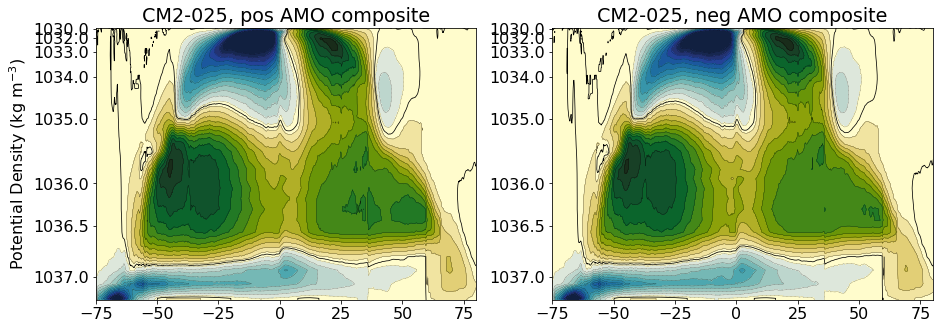

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))
ax0 = ax[0]
ax1 = ax[1]


# CM2-025 pos amo composite
p1 = ax0.contourf(psi_CM2_025_amo_pos.grid_yu_ocean,(psi_CM2_025_amo_pos.potrho-1028)**scfac, psi_CM2_025_amo_pos, cmap=cm.cm.delta, levels=clev, extend='both')
ax0.contour(psi_CM2_025_amo_pos.grid_yu_ocean,(psi_CM2_025_amo_pos.potrho-1028)**scfac, psi_CM2_025_amo_pos, levels=clev, colors='k', linewidths=0.25)
ax0.contour(psi_CM2_025_amo_pos.grid_yu_ocean,(psi_CM2_025_amo_pos.potrho-1028)**scfac, psi_CM2_025_amo_pos, levels=[0.0,], colors='k', linewidths=0.75)
ax0.set_yticks((yticks-1028)**scfac)
ax0.set_yticklabels(yticks)
ax0.set_ylim([0.5**scfac, 9.2**scfac])
ax0.invert_yaxis()
ax0.set_ylabel('Potential Density (kg m$^{-3}$)')
ax0.set_xlim([-75,80])
ax0.set_title('CM2-025, pos AMO composite')
#ax0.tick_params(labelbottom=False)

# CM2-025 neg amo composite
p1 = ax1.contourf(psi_CM2_025_amo_neg.grid_yu_ocean,(psi_CM2_025_amo_neg.potrho-1028)**scfac, psi_CM2_025_amo_neg, cmap=cm.cm.delta, levels=clev, extend='both')
ax1.contour(psi_CM2_025_amo_neg.grid_yu_ocean,(psi_CM2_025_amo_neg.potrho-1028)**scfac, psi_CM2_025_amo_neg, levels=clev, colors='k', linewidths=0.25)
ax1.contour(psi_CM2_025_amo_neg.grid_yu_ocean,(psi_CM2_025_amo_neg.potrho-1028)**scfac, psi_CM2_025_amo_neg, levels=[0.0,], colors='k', linewidths=0.75)
ax1.set_yticks((yticks-1028)**scfac)
ax1.set_yticklabels(yticks)
ax1.set_ylim([0.5**scfac, 9.2**scfac])
ax1.invert_yaxis()
ax1.set_xlim([-75,80])
ax1.set_title('CM2-025, neg AMO composite')
#ax1.tick_params(labelbottom=False)


Text(0.5, 1.0, 'CM2-025, neg AMO anomaly')

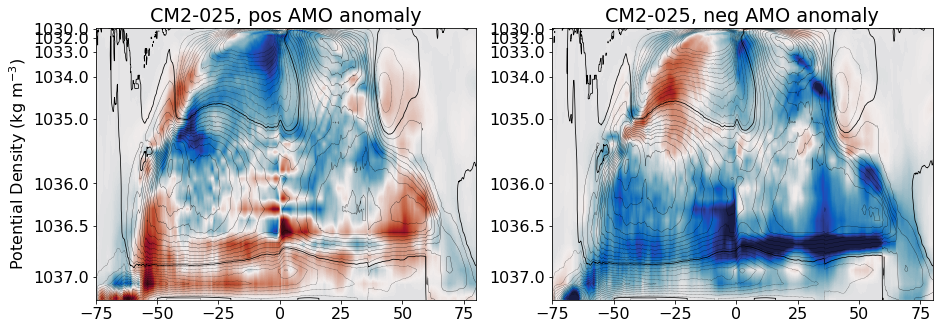

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))
ax0 = ax[0]
ax1 = ax[1]


# CM2-025 pos amo composite
p1 = ax0.contourf(psi_CM2_025_amo_pos.grid_yu_ocean,(psi_CM2_025_amo_pos.potrho-1028)**scfac, psi_CM2_025_amo_pos-psi_CM2_025_mean, cmap=cm.cm.balance, levels=np.arange(-1,1.1,0.01), extend='both')
ax0.contour(psi_CM2_025_amo_pos.grid_yu_ocean,(psi_CM2_025_amo_pos.potrho-1028)**scfac, psi_CM2_025_amo_pos, levels=clev, colors='k', linewidths=0.25)
ax0.contour(psi_CM2_025_amo_pos.grid_yu_ocean,(psi_CM2_025_amo_pos.potrho-1028)**scfac, psi_CM2_025_amo_pos, levels=[0.0,], colors='k', linewidths=0.75)
ax0.set_yticks((yticks-1028)**scfac)
ax0.set_yticklabels(yticks)
ax0.set_ylim([0.5**scfac, 9.2**scfac])
ax0.invert_yaxis()
ax0.set_ylabel('Potential Density (kg m$^{-3}$)')
ax0.set_xlim([-75,80])
ax0.set_title('CM2-025, pos AMO anomaly')
#ax0.tick_params(labelbottom=False)

# CM2-025 neg amo composite
p1 = ax1.contourf(psi_CM2_025_amo_neg.grid_yu_ocean,(psi_CM2_025_amo_neg.potrho-1028)**scfac, psi_CM2_025_amo_neg-psi_CM2_025_mean, cmap=cm.cm.balance, levels=np.arange(-1,1.1,0.01), extend='both')
ax1.contour(psi_CM2_025_amo_neg.grid_yu_ocean,(psi_CM2_025_amo_neg.potrho-1028)**scfac, psi_CM2_025_amo_neg, levels=clev, colors='k', linewidths=0.25)
ax1.contour(psi_CM2_025_amo_neg.grid_yu_ocean,(psi_CM2_025_amo_neg.potrho-1028)**scfac, psi_CM2_025_amo_neg, levels=[0.0,], colors='k', linewidths=0.75)
ax1.set_yticks((yticks-1028)**scfac)
ax1.set_yticklabels(yticks)
ax1.set_ylim([0.5**scfac, 9.2**scfac])
ax1.invert_yaxis()
ax1.set_xlim([-75,80])
ax1.set_title('CM2-025, neg AMO anomaly')
#ax1.tick_params(labelbottom=False)


### Time series of max values

In [71]:
max_NH = psi_CM2_025.sel(grid_yu_ocean=slice(10,90)).max('potrho').max('grid_yu_ocean')

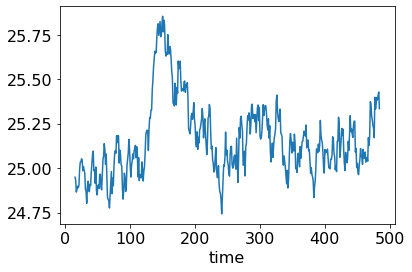

In [74]:
max_NH.rolling(time=30, center=True).mean('time').plot()

In [77]:
min_SH = psi_CM2_025.sel(grid_yu_ocean=slice(-90,-60)).min('potrho').min('grid_yu_ocean')

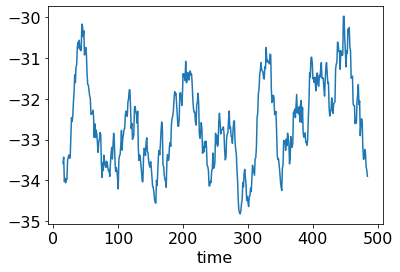

In [78]:
min_SH.rolling(time=30, center=True).mean('time').plot()

### Numbers

In [17]:
# density and Sv of deep overturning in mean, pos composite, neg composite
# for all experiments (mean Sv and rho)

In [28]:
print('CM2-025')
print(np.round(psi_CM2_025_mean.sel(grid_yu_ocean=slice(-75,-50)).min('grid_yu_ocean').min().values, 2), 'Sv')
index = psi_CM2_025_mean.sel(grid_yu_ocean=slice(-75,-50)).min('grid_yu_ocean').argmin().values
print(psi_CM2_025_mean.sel(grid_yu_ocean=slice(-75,-50)).potrho[index].values)
print('')
print('CM2-1')
print(np.round(psi_CM2_1_mean.sel(grid_yu_ocean=slice(-75,-50)).min('grid_yu_ocean').min().values, 2), 'Sv')
index = psi_CM2_1_mean.sel(grid_yu_ocean=slice(-75,-50)).min('grid_yu_ocean').argmin().values
print(psi_CM2_1_mean.sel(grid_yu_ocean=slice(-75,-50)).potrho[index].values)
print('')
print('OM2-025')
print(np.round(psi_OM2_025_mean.sel(grid_yu_ocean=slice(-75,-50)).min('grid_yu_ocean').min().values, 2), 'Sv')
index = psi_OM2_025_mean.sel(grid_yu_ocean=slice(-75,-50)).min('grid_yu_ocean').argmin().values
print(psi_OM2_025_mean.sel(grid_yu_ocean=slice(-75,-50)).potrho[index].values)
print('')
print('OM2-1')
print(np.round(psi_OM2_1_mean.sel(grid_yu_ocean=slice(-75,-50)).min('grid_yu_ocean').min().values, 2), 'Sv')
index = psi_OM2_1_mean.sel(grid_yu_ocean=slice(-75,-50)).min('grid_yu_ocean').argmin().values
print(psi_OM2_1_mean.sel(grid_yu_ocean=slice(-75,-50)).potrho[index].values)
print('')

CM2-025
-31.0 Sv
1037.1875

CM2-1
-32.67 Sv
1037.0625

OM2-025
-28.78 Sv
1037.0625

OM2-1
-15.66 Sv
1037.0625



In [30]:
print('CM2-025, pos anomaly')
print(np.round(psi_CM2_025_amo_pos.sel(grid_yu_ocean=slice(-75,-50)).min('grid_yu_ocean').min().values, 2), 'Sv')
index = psi_CM2_025_amo_pos.sel(grid_yu_ocean=slice(-75,-50)).min('grid_yu_ocean').argmin().values
print(psi_CM2_025_amo_pos.sel(grid_yu_ocean=slice(-75,-50)).potrho[index].values)
print('')
print('CM2-025, neg anomaly')
print(np.round(psi_CM2_025_amo_neg.sel(grid_yu_ocean=slice(-75,-50)).min('grid_yu_ocean').min().values, 2), 'Sv')
index = psi_CM2_025_amo_neg.sel(grid_yu_ocean=slice(-75,-50)).min('grid_yu_ocean').argmin().values
print(psi_CM2_025_amo_neg.sel(grid_yu_ocean=slice(-75,-50)).potrho[index].values)

CM2-025, pos anomaly
-30.2 Sv
1037.1875

CM2-025, neg anomaly
-32.6 Sv
1037.1875


### AMOC time series

#### 26 North

In [36]:
amoc_26N_CM2_025 = xr.open_dataarray(path_to_data + 'psi_AMOC_26N_annual.nc')

In [37]:
amoc_26N_CM2_1 = xr.open_dataarray(path_to_data + '/Comparison_ACCESS_CM2_1/psi_AMOC_26N_annual_CM2_1.nc')

In [43]:
amoc_26N_OM2_025 = xr.open_dataarray(path_to_data + '/Comparison_ACCESS_OM2_025/psi_AMOC_26N_annual_OM2_025.nc')

In [ ]:
amoc_26N_OM2_1 = xr.open_dataarray(path_to_data + '/Comparison_ACCESS_OM2_1/psi_AMOC_26N_annual_OM2_1.nc')

In [46]:
print('CM2-025')
print(np.round(amoc_26N_CM2_025.sel(time=slice('0400-01-01','0499-12-31')).mean('time').values, 2), 'Sv')
print('')
print('CM2-1')
print(np.round(amoc_26N_CM2_1.sel(time=slice('0400-01-01','0499-12-31')).mean('time').values, 2), 'Sv')
print('')
print('OM2-025') # Different years, no gm component in calculation (output missing)
print(np.round(amoc_26N_OM2_025.sel(time=slice('2200-01-01','2299-12-31')).mean('time').values, 2), 'Sv')
print('')
print('OM2-1') # Different years
print(np.round(amoc_26N_OM2_1.sel(time=slice('2100-01-01','2199-12-31')).mean('time').values, 2), 'Sv')

CM2-025
15.6 Sv

CM2-1
16.28 Sv

OM2-025
15.1 Sv

OM2-1
10.67 Sv


#### Abyssal overturning at 40S

In [7]:
amoc_40S_CM2_025 = xr.open_dataarray(path_to_data + 'psi_AMOC_40S_annual_yr_400_499.nc')

In [11]:
amoc_40S_CM2_1 = xr.open_dataarray(path_to_data + '/Comparison_ACCESS_CM2_1/psi_AMOC_40S_annual_CM2_1_yr_400_499.nc')
amoc_40S_OM2_025 = xr.open_dataarray(path_to_data + '/Comparison_ACCESS_OM2_025/psi_AMOC_40S_annual_OM2_025_yr_2300_2399.nc')
amoc_40S_OM2_1 = xr.open_dataarray(path_to_data + '/Comparison_ACCESS_OM2_1/psi_AMOC_40S_annual_OM2_1_yr_2500_2599.nc')

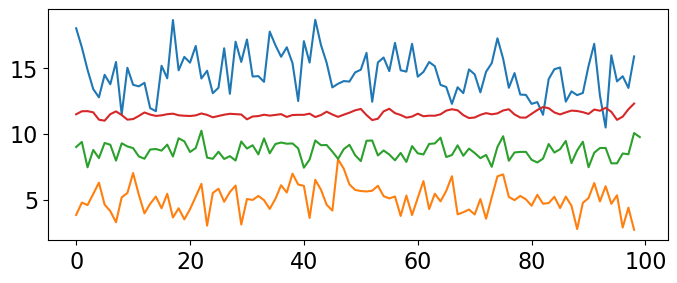

In [16]:
fig = plt.figure(figsize=(8,3))

plt.plot(amoc_40S_CM2_025)
plt.plot(amoc_40S_CM2_1)
plt.plot(amoc_40S_OM2_025)
plt.plot(amoc_40S_OM2_1)

In [17]:
print('CM2-025')
print(np.round(amoc_40S_CM2_025.sel(time=slice('0400-01-01','0499-12-31')).mean('time').values, 2), 'Sv')
print('')
print('CM2-1')
print(np.round(amoc_40S_CM2_1.sel(time=slice('0400-01-01','0499-12-31')).mean('time').values, 2), 'Sv')
print('')
print('OM2-025') # No gm component in calculation (output missing)
print(np.round(amoc_40S_OM2_025.sel(time=slice('2300-01-01','2399-12-31')).mean('time').values, 2), 'Sv')
print('')
print('OM2-1') # Different years
print(np.round(amoc_40S_OM2_1.sel(time=slice('2500-01-01','2599-12-31')).mean('time').values, 2), 'Sv')

CM2-025
14.59 Sv

CM2-1
5.04 Sv

OM2-025
8.7 Sv

OM2-1
11.49 Sv


### Overturning per basin

In [24]:
atlantic_CM2_025 = xr.open_dataarray(path_to_data + 'atlantic_psi_400_499.nc').mean('time')
indopacific_CM2_025 = xr.open_dataarray(path_to_data + 'indopacific_psi_400_499.nc').mean('time')

In [25]:
atlantic_CM2_1 = xr.open_dataarray(path_to_data + '/Comparison_ACCESS_CM2_1/atlantic_psi_400_499_CM2_1.nc').mean('time')
indopacific_CM2_1 = xr.open_dataarray(path_to_data + '/Comparison_ACCESS_CM2_1/indopacific_psi_400_499_CM2_1.nc').mean('time')

In [26]:
atlantic_OM2_025 = xr.open_dataarray(path_to_data + '/Comparison_ACCESS_OM2_025/atlantic_psi_2300_2399_OM2_025.nc').mean('time')
indopacific_OM2_025 = xr.open_dataarray(path_to_data + '/Comparison_ACCESS_OM2_025/indopacific_psi_2300_2399_OM2_025.nc').mean('time')

In [27]:
atlantic_OM2_1 = xr.open_dataarray(path_to_data + '/Comparison_ACCESS_OM2_1/atlantic_psi_2500_2599_OM2_1.nc').mean('time')
indopacific_OM2_1 = xr.open_dataarray(path_to_data + '/Comparison_ACCESS_OM2_1/indopacific_psi_2500_2599_OM2_1.nc').mean('time')

Plotting

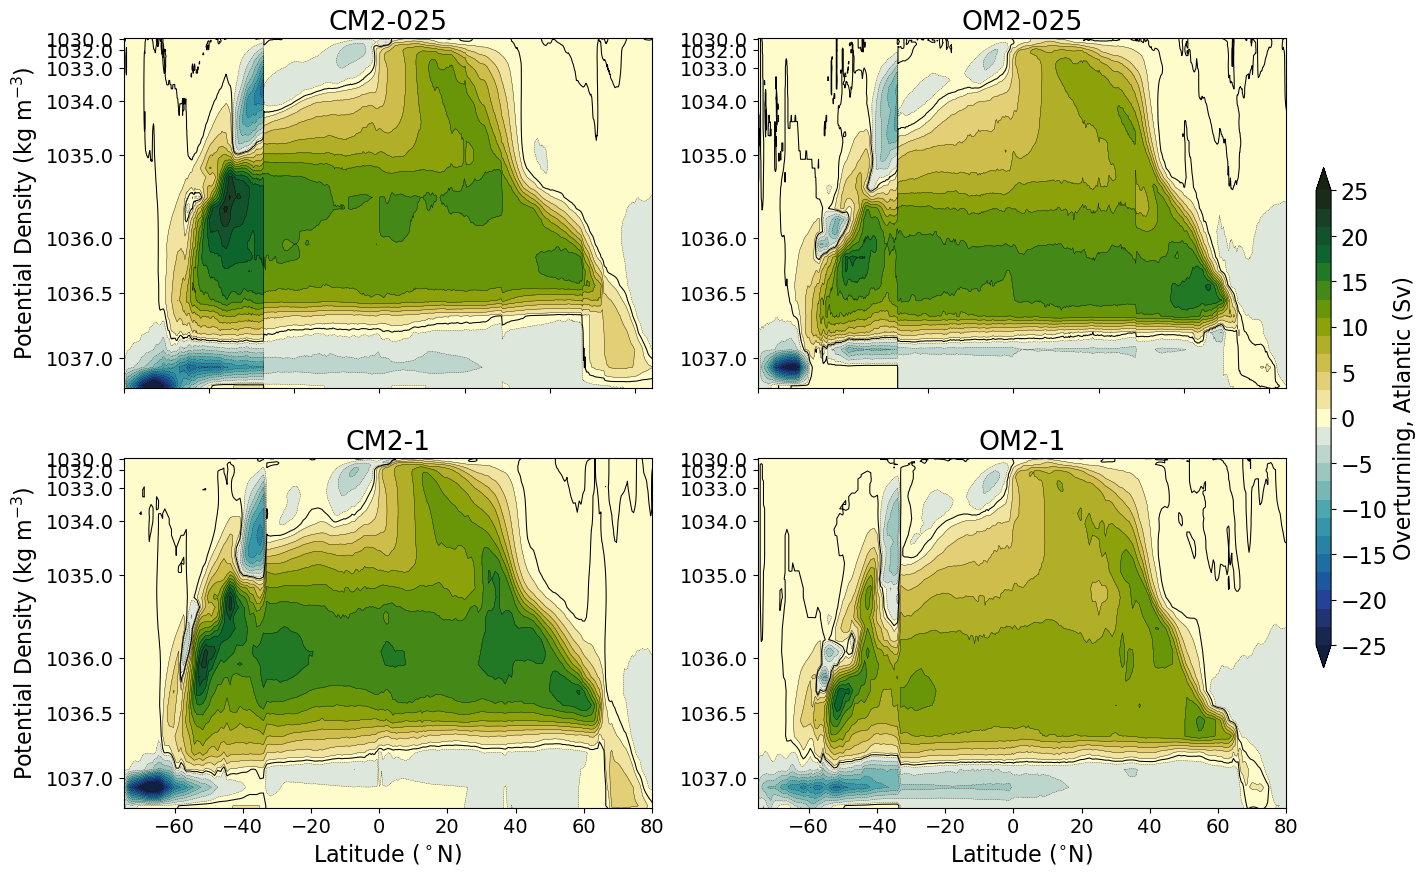

In [35]:
fig, ax = plt.subplots(2,2, figsize=(15,10))
ax0 = ax[0,0]
ax1 = ax[0,1]
ax2 = ax[1,0]
ax3 = ax[1,1]

# CM2-025
p1 = ax0.contourf(atlantic_CM2_025.grid_yu_ocean,(atlantic_CM2_025.potrho-1028)**scfac, atlantic_CM2_025, cmap=cm.cm.delta, levels=clev, extend='both')
ax0.contour(atlantic_CM2_025.grid_yu_ocean,(atlantic_CM2_025.potrho-1028)**scfac, atlantic_CM2_025, levels=clev, colors='k', linewidths=0.25)
ax0.contour(atlantic_CM2_025.grid_yu_ocean,(atlantic_CM2_025.potrho-1028)**scfac, atlantic_CM2_025, levels=[0.0,], colors='k', linewidths=0.75)
ax0.set_yticks((yticks-1028)**scfac)
ax0.set_yticklabels(yticks, fontsize=ft_size-2)
ax0.set_ylim([0.5**scfac, 9.2**scfac])
ax0.invert_yaxis()
ax0.set_ylabel('Potential Density (kg m$^{-3}$)')
ax0.set_xlim([-75,80])
ax0.set_title('CM2-025')
ax0.tick_params(labelbottom=False)

# OM2-025
p1 = ax1.contourf(atlantic_OM2_025.grid_yu_ocean,(atlantic_OM2_025.potrho-1028)**scfac, atlantic_OM2_025, cmap=cm.cm.delta, levels=clev, extend='both')
ax1.contour(atlantic_OM2_025.grid_yu_ocean,(atlantic_OM2_025.potrho-1028)**scfac, atlantic_OM2_025, levels=clev, colors='k', linewidths=0.25)
ax1.contour(atlantic_OM2_025.grid_yu_ocean,(atlantic_OM2_025.potrho-1028)**scfac, atlantic_OM2_025, levels=[0.0,], colors='k', linewidths=0.75)
ax1.set_yticks((yticks-1028)**scfac)
ax1.set_yticklabels(yticks, fontsize=ft_size-2)
ax1.set_ylim([0.5**scfac, 9.2**scfac])
ax1.invert_yaxis()
ax1.set_xlim([-75,80])
ax1.set_title('OM2-025')
ax1.tick_params(labelbottom=False)

# CM2-1
p1 = ax2.contourf(atlantic_CM2_1.grid_yu_ocean,(atlantic_CM2_1.potrho-1028)**scfac, atlantic_CM2_1, cmap=cm.cm.delta, levels=clev, extend='both')
ax2.contour(atlantic_CM2_1.grid_yu_ocean,(atlantic_CM2_1.potrho-1028)**scfac, atlantic_CM2_1, levels=clev, colors='k', linewidths=0.25)
ax2.contour(atlantic_CM2_1.grid_yu_ocean,(atlantic_CM2_1.potrho-1028)**scfac, atlantic_CM2_1, levels=[0.0,], colors='k', linewidths=0.75)
ax2.set_yticks((yticks-1028)**scfac)
ax2.set_yticklabels(yticks, fontsize=ft_size-2)
ax2.set_ylim([0.5**scfac, 9.2**scfac])
ax2.invert_yaxis()
ax2.set_xlabel('Latitude ($^\circ$N)')
ax2.set_xlim([-75,80])
ax2.set_title('CM2-1')
ax2.set_ylabel('Potential Density (kg m$^{-3}$)')
ax2.tick_params(axis='both', labelsize=ft_size-2)

# OM2-1
p1 = ax3.contourf(atlantic_OM2_1.grid_yu_ocean,(atlantic_OM2_1.potrho-1028)**scfac, atlantic_OM2_1, cmap=cm.cm.delta, levels=clev, extend='both')
ax3.contour(atlantic_OM2_1.grid_yu_ocean,(atlantic_OM2_1.potrho-1028)**scfac, atlantic_OM2_1, levels=clev, colors='k', linewidths=0.25)
ax3.contour(atlantic_OM2_1.grid_yu_ocean,(atlantic_OM2_1.potrho-1028)**scfac, atlantic_OM2_1, levels=[0.0,], colors='k', linewidths=0.75)
ax3.set_yticks((yticks-1028)**scfac)
ax3.set_yticklabels(yticks, fontsize=ft_size-2)
ax3.set_ylim([0.5**scfac, 9.2**scfac])
ax3.invert_yaxis()
ax3.set_xlabel('Latitude ($^{\circ}$N)')
ax3.set_xlim([-75,80])
ax3.set_title('OM2-1')
ax3.tick_params(axis='both', labelsize=ft_size-2)

# Plot colorbar
cax  = plt.axes([0.92, 0.25, 0.01, 0.5])
cbar = plt.colorbar(p1, cax=cax, orientation='vertical', ticks=np.arange(-25, 30, 5))
cbar.set_label('Overturning, Atlantic (Sv)')

# Finished
save_flag = 1
if save_flag == 1:
    fig_name = 'Fig_overturning_psi_atlantic.png'
    plt.savefig(fig_path + fig_name, dpi=300);

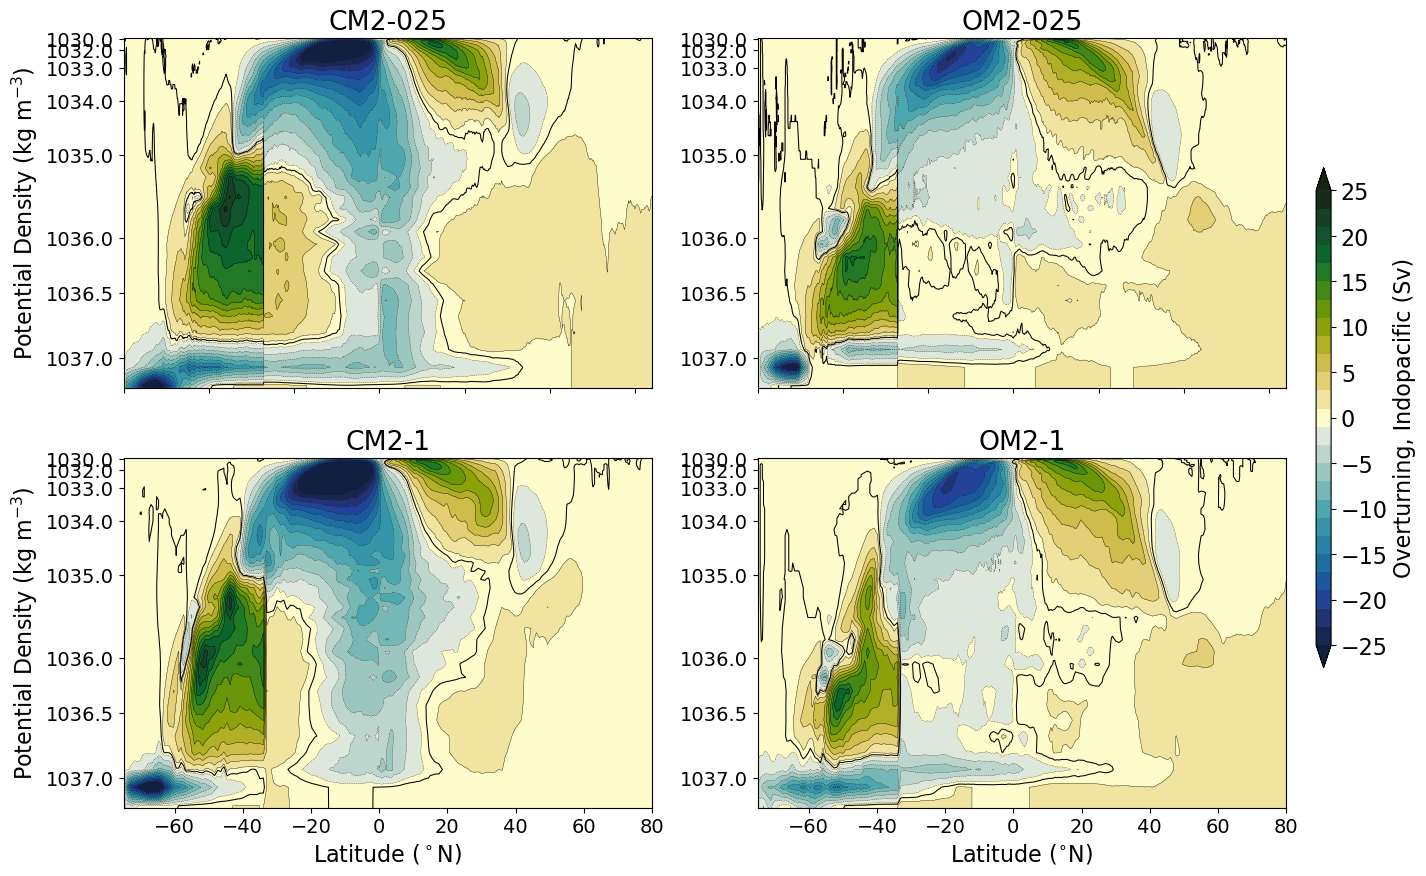

In [34]:
fig, ax = plt.subplots(2,2, figsize=(15,10))
ax0 = ax[0,0]
ax1 = ax[0,1]
ax2 = ax[1,0]
ax3 = ax[1,1]

# CM2-025
p1 = ax0.contourf(indopacific_CM2_025.grid_yu_ocean,(indopacific_CM2_025.potrho-1028)**scfac, indopacific_CM2_025, cmap=cm.cm.delta, levels=clev, extend='both')
ax0.contour(indopacific_CM2_025.grid_yu_ocean,(indopacific_CM2_025.potrho-1028)**scfac, indopacific_CM2_025, levels=clev, colors='k', linewidths=0.25)
ax0.contour(indopacific_CM2_025.grid_yu_ocean,(indopacific_CM2_025.potrho-1028)**scfac, indopacific_CM2_025, levels=[0.0,], colors='k', linewidths=0.75)
ax0.set_yticks((yticks-1028)**scfac)
ax0.set_yticklabels(yticks, fontsize=ft_size-2)
ax0.set_ylim([0.5**scfac, 9.2**scfac])
ax0.invert_yaxis()
ax0.set_ylabel('Potential Density (kg m$^{-3}$)')
ax0.set_xlim([-75,80])
ax0.set_title('CM2-025')
ax0.tick_params(labelbottom=False)

# OM2-025
p1 = ax1.contourf(indopacific_OM2_025.grid_yu_ocean,(indopacific_OM2_025.potrho-1028)**scfac, indopacific_OM2_025, cmap=cm.cm.delta, levels=clev, extend='both')
ax1.contour(indopacific_OM2_025.grid_yu_ocean,(indopacific_OM2_025.potrho-1028)**scfac, indopacific_OM2_025, levels=clev, colors='k', linewidths=0.25)
ax1.contour(indopacific_OM2_025.grid_yu_ocean,(indopacific_OM2_025.potrho-1028)**scfac, indopacific_OM2_025, levels=[0.0,], colors='k', linewidths=0.75)
ax1.set_yticks((yticks-1028)**scfac)
ax1.set_yticklabels(yticks, fontsize=ft_size-2)
ax1.set_ylim([0.5**scfac, 9.2**scfac])
ax1.invert_yaxis()
ax1.set_xlim([-75,80])
ax1.set_title('OM2-025')
ax1.tick_params(labelbottom=False)

# CM2-1
p1 = ax2.contourf(indopacific_CM2_1.grid_yu_ocean,(indopacific_CM2_1.potrho-1028)**scfac, indopacific_CM2_1, cmap=cm.cm.delta, levels=clev, extend='both')
ax2.contour(indopacific_CM2_1.grid_yu_ocean,(indopacific_CM2_1.potrho-1028)**scfac, indopacific_CM2_1, levels=clev, colors='k', linewidths=0.25)
ax2.contour(indopacific_CM2_1.grid_yu_ocean,(indopacific_CM2_1.potrho-1028)**scfac, indopacific_CM2_1, levels=[0.0,], colors='k', linewidths=0.75)
ax2.set_yticks((yticks-1028)**scfac)
ax2.set_yticklabels(yticks, fontsize=ft_size-2)
ax2.set_ylim([0.5**scfac, 9.2**scfac])
ax2.invert_yaxis()
ax2.set_xlabel('Latitude ($^\circ$N)')
ax2.set_xlim([-75,80])
ax2.set_title('CM2-1')
ax2.set_ylabel('Potential Density (kg m$^{-3}$)')
ax2.tick_params(axis='both', labelsize=ft_size-2)

# OM2-1
p1 = ax3.contourf(indopacific_OM2_1.grid_yu_ocean,(indopacific_OM2_1.potrho-1028)**scfac, indopacific_OM2_1, cmap=cm.cm.delta, levels=clev, extend='both')
ax3.contour(indopacific_OM2_1.grid_yu_ocean,(indopacific_OM2_1.potrho-1028)**scfac, indopacific_OM2_1, levels=clev, colors='k', linewidths=0.25)
ax3.contour(indopacific_OM2_1.grid_yu_ocean,(indopacific_OM2_1.potrho-1028)**scfac, indopacific_OM2_1, levels=[0.0,], colors='k', linewidths=0.75)
ax3.set_yticks((yticks-1028)**scfac)
ax3.set_yticklabels(yticks, fontsize=ft_size-2)
ax3.set_ylim([0.5**scfac, 9.2**scfac])
ax3.invert_yaxis()
ax3.set_xlabel('Latitude ($^{\circ}$N)')
ax3.set_xlim([-75,80])
ax3.set_title('OM2-1')
ax3.tick_params(axis='both', labelsize=ft_size-2)

# Plot colorbar
cax  = plt.axes([0.92, 0.25, 0.01, 0.5])
cbar = plt.colorbar(p1, cax=cax, orientation='vertical', ticks=np.arange(-25, 30, 5))
cbar.set_label('Overturning, Indopacific (Sv)')

# Finished
save_flag = 1
if save_flag == 1:
    fig_name = 'Fig_overturning_psi_indopacific.png'
    plt.savefig(fig_path + fig_name, dpi=300);